<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/Coloma%2C_Orbe%2C_Posso_Deberes_Progreso_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Universidad de las Américas
<h4>Integrantes: </h4> Kevin Coloma, Fernando Orbe, Martin Posso

#Deberes progreso 2
HW 2.1 (15%)
For the system implemented in homework HW 1.2 Sarw islands.
Use the simplest possible system limits∈{−1,1}.
<h3>Answer the following:</h3>
List all possible walks in the sample space (and calculate their probability of occurring).
From the sample space above, what is the probability of occurring an iSarw (island with Area>0).

Compare with simulation results,
both the probability for all possible walks (5%) as well for an iSarw (5%).
List all possible steps for an iSarw, and define the PMF.
Compare with simulation results (5%).

<h3>Optional:</h3> Answer the items above for a traditional Sarw.
The figure below shows some of the elements of the sample space for this excercise:

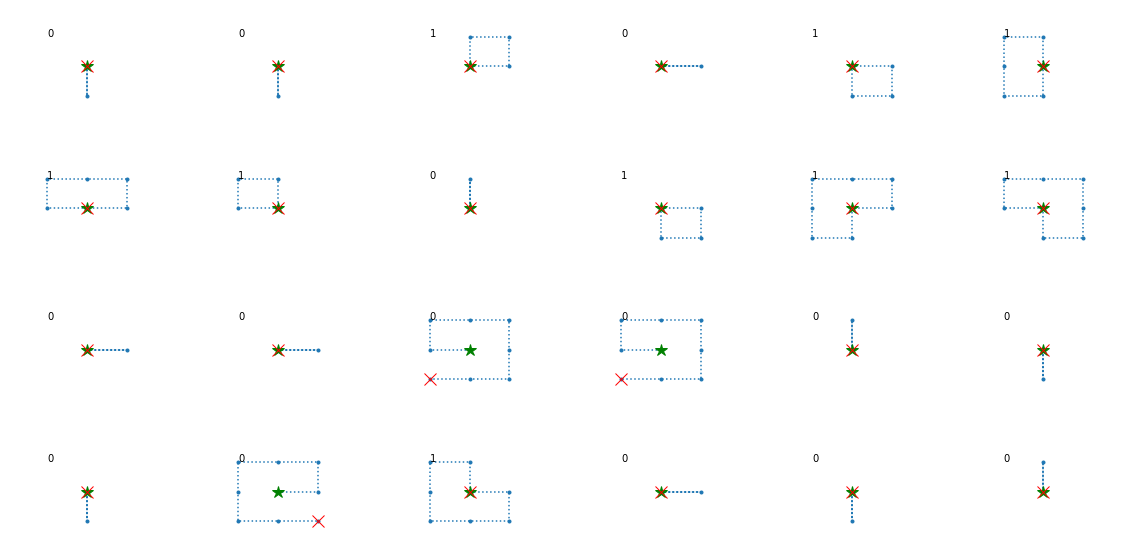

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import time
import matplotlib.pyplot as plt
from scipy.special import  comb

In [ ]:
List_possible_walks = []
List_all_steps = []

In [ ]:
def generateMoves(x, y):
  return [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)]

def SARW(limit = 1): #generates the movement
  origin = (0, 0)
  positions = [] #stores all moves done
  positions.append(origin)
  x, y = [0], [0] #variables for generating moves

  stuck = 0 #variable to check whether it has stopped
  returned = 0 #checks if it has returned to the origin
  movements = 0 #steps count
  i = 0

  while True:#Loop for walk
    moves = generateMoves(x[-1], y[-1]) #generates the moves
    availables = [] #stores all possible walks available
    movements += 1 #increments the steps count
    for mx, my in moves: #loop for checking the movements available
      if (mx, my) not in positions: #if x and y is not in positions then we add to availables
        if (-limit <= mx <= limit) and (-limit <= my <= limit): #checks if the possible move is contain in the space between the limit e.g {-1; 1}
          availables.append((mx, my)) #it stores x and y in availables
      if (mx, my) == (0, 0):
        availables.append((mx, my))
      #if (0, 0) in moves and movements > 0: #this lets the walk return to the origin if it has already moved one step
        #availables.append((0, 0)) #we store origin in availables
    if availables: #it checks if there are available steps for it to walk
      mx, my = availables[np.random.choice(len(availables))] #it chooses a random value between the available options
      positions.append((mx, my)) #it updates our array for positions with our random choice
      x.append(mx) #it saves x and y values
      y.append(my)
    else:
      stuck = 1 #stops the loop if it has stopped
      movements = i + 1
      break

    if origin in positions[1:]: #it breaks the loop if it has returned to the origin
      returned = 1
      movements = i + 1
      break
    i += 1
  return x, y, stuck, movements, returned, positions #returns all Values

In [ ]:
SARW()

([0, 0, 0], [0, -1, 0], 0, 2, 1, [(0, 0), (0, -1), (0, 0)])

In [ ]:
def prob_of_return(iterations = 10, limit = 1): #simulates the walks
  #variables
  allsteps = 0
  prob = 0
  meanSteps = 0
  count_success = 0

  #counts
  count_all_steps = [0] * 1000
  prob_all_steps = [0] * 1000
  count_all_walks = [0] * 1000
  prob_all_walks = [0] * 1000

  for i in range(0, iterations):
    #calls our function to generate the random Walk
    x, y, stuck, movements, returned, positions = SARW(limit)
    if (returned == 1) and (movements >= 4): #increments our counter if it was a succesfull walk
      count_success += 1
      allsteps += movements
      prob_of_steps(movements, count_all_steps)

    prob_of_walks(positions, count_all_walks)

  for i in range(len(count_all_walks)):
    if (prob_all_walks[i], count_all_walks[i]) != (0, 0):
      prob_all_walks[i] = count_all_walks[i] / iterations

  for i in range(len(count_all_steps)):
    if (prob_all_steps[i], count_all_steps[i]) != (0, 0):
      prob_all_steps[i] = count_all_steps[i] / count_success

  prob = count_success / iterations
  meanSteps = allsteps / count_success
  return prob, meanSteps, prob_all_steps, count_success, prob_all_walks

In [ ]:
def prob_of_walks(positions, count_all_walks):

  if positions not in List_possible_walks: #stores all possible walks
    List_possible_walks.append(positions)

  for i in range(len(List_possible_walks)):
    if np.array_equal(positions, List_possible_walks[i]):
      count_all_walks[i] += 1

In [ ]:
def prob_of_steps(steps, count_all_steps):
  #variables

  if steps not in List_all_steps: #stores all possible steps
    List_all_steps.append(steps)

  for i in range(len(List_all_steps)):
    if steps == List_all_steps[i]:
      count_all_steps[i] += 1

In [ ]:
prob, meanSteps, prob_all_steps, count_success, prob_all_walks = prob_of_return(100000, 1)

print('----------------------- List Possible Walks -----------------------\n')
for i in range(len(List_possible_walks)):
  if (prob_all_walks[i], List_possible_walks[i]) != (0, 0):
    print(prob_all_walks[i], ' probability of ', List_possible_walks[i])


print('\n------------------PMF----------------\n')
for i in range(len(List_all_steps)):
  if (List_all_steps[i], prob_all_steps[i]) != (0, 0):
    print(List_all_steps[i], ' probability of ', prob_all_steps[i])

print('\nSum of PMF: ', np.sum(prob_all_steps), '\n')

print('-------------------------------------------')
print('Probability of occurring an ISARW: ', prob, ' with mean steps ', meanSteps)

----------------------- List Possible Walks -----------------------

0.02065  probability of  [(0, 0), (0, -1), (-1, -1), (-1, 0), (-1, 1), (0, 1), (0, 0)]
0.0426  probability of  [(0, 0), (0, -1), (1, -1), (1, 0), (0, 0)]
0.08282  probability of  [(0, 0), (1, 0), (0, 0)]
0.0421  probability of  [(0, 0), (-1, 0), (-1, -1), (0, -1), (0, 0)]
0.01086  probability of  [(0, 0), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (0, 0)]
0.04188  probability of  [(0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)]
0.08351  probability of  [(0, 0), (0, -1), (0, 0)]
0.02101  probability of  [(0, 0), (-1, 0), (-1, -1), (0, -1), (1, -1), (1, 0), (0, 0)]
0.01009  probability of  [(0, 0), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1)]
0.02098  probability of  [(0, 0), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (0, 0)]
0.01003  probability of  [(0, 0), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1), (0, 1), (0, 0)]
0.00986  probability of  [(0, 0), (0, -1), (-1, -1),

#HW 2.2 (15%)

Explore the systems for limits∈{−li,li} for li∈{1,2,…,20}.

<h3>Answer the following:</h3>
Describe the probability of an iSarw as the limits increases (10%).
Describe the mean steps (mean life) of an iSarw as the limits increases (10%).

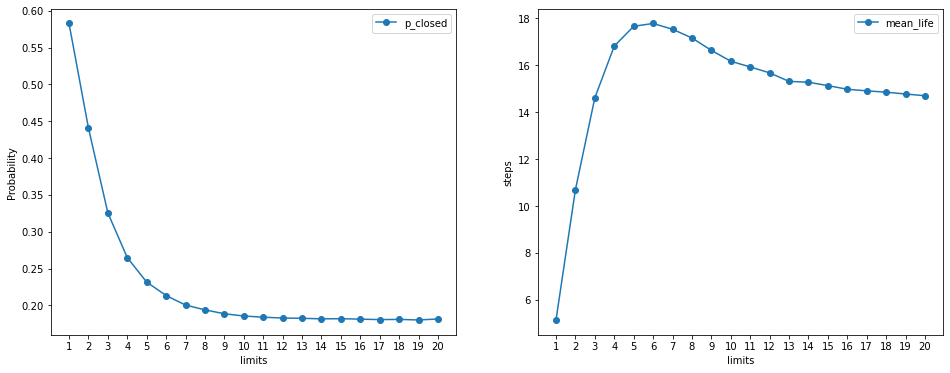

#HW 2.2a (5%)
Automate the code for the simulations on HW 2.2.

In [ ]:
def increase_limits(last, num_simulations = 10000):
  prob_limits = []
  mean_life_steps = []

  for j in range(1, last + 1):
    allSteps = 0
    meanSteps = 0
    probability = 0
    count = 0
    for i in range(1, num_simulations):
      x, y, stuck, movements, returned, positions = SARW(j)

      if (returned == 1) and (movements >= 4):
        count += 1
        allSteps += movements
    probability = count / num_simulations
    meanSteps = allSteps / count

    prob_limits.append(probability)
    mean_life_steps.append(meanSteps)
  return prob_limits, mean_life_steps

Text(0, 0.5, 'Mean Life Of Steps')

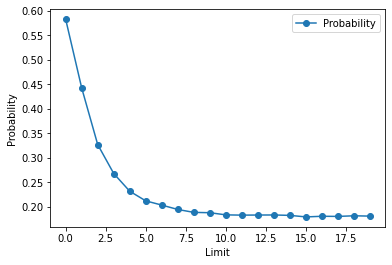

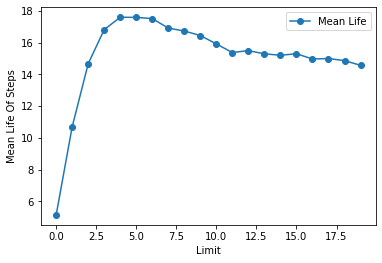

In [ ]:
prob_limits, mean_life_steps = increase_limits(20, 100000)

plt.figure('Increase of Limits')
plt.plot(prob_limits, 'o-')
plt.legend(['Probability'])
plt.xlabel('Limit')
plt.ylabel('Probability')

plt.figure('Mean life of Steps')
plt.plot(mean_life_steps, 'o-')
plt.legend(['Mean Life'])
plt.xlabel('Limit')
plt.ylabel('Mean Life Of Steps')


As we can seee on the graphs above the probability of having an ISARW as the limit increases becomes less probable each time. On the other hand, we have can see how the mean life of steps becomes greater each time as the limit increases. Therefore, As the limit increases there is more room for the ISARW to walk. But, the chances of a SARW to become an ISARW decreases, as we can appreciate it on the graphs. e.g a SARW with Limits {-1 ; 1} has a chance of 0.5802 aprox of becoming an ISARW and a SARW with Limits {-10 ; 10} has a chance of 0.1802.